In [1]:

%matplotlib inline
import numpy as np
import lsst.sims.featureScheduler as fs
from lsst.sims.speedObservatory import Speed_observatory
import matplotlib.pylab as plt
import healpy as hp
from lsst.sims.utils import _hpid2RaDec
import time
from lsst.sims.utils import _healbin
import sys

from lsst.sims.featureScheduler.thomson import xyz2thetaphi, thetaphi2xyz

/Users/yoachim/gitRepos/sims_featureScheduler/python/lsst/sims/featureScheduler/utils.py:27: UserWarning: Could not import ts.scheduler. This is required to load the FieldsDatabase. In this case
it will fallback to loading fields from the local "fieldID.lis" file.
  it will fallback to loading fields from the local "fieldID.lis" file.''')


In [2]:
class fast_spin(fs.Greedy_survey_fields):
    def _spin_fields(self, lon=None, lat=None, lon2=None):
        """Spin the field tessellation to generate a random orientation
        """
        if lon is None:
            lon = np.random.rand()*np.pi*2
        if lat is None:
            lat = np.random.rand()*np.pi*2
        if lon2 is None:
            lon2 = np.random.rand()*np.pi*2
        # rotate longitude
        ra = (self.fields_init['RA'] + lon) % (2.*np.pi)
        dec = self.fields_init['dec'] + 0
        #ra = (self.fields['RA'] + lon) % (2.*np.pi)
        #dec = self.fields['dec'] + 0
        

        # Now to rotate ra and dec about the x-axis
        x, y, z = thetaphi2xyz(ra, dec+np.pi/2.)
        xp, yp, zp = fs.rotx(lat, x, y, z)
        theta, phi = fs.xyz2thetaphi(xp, yp, zp)
        dec = phi - np.pi/2
        ra = theta + np.pi

        # One more RA rotation
        ra = (ra + lon2) % (2.*np.pi)

        self.fields['RA'] = ra
        self.fields['dec'] = dec

In [3]:
survey = fast_spin([],[])

In [4]:
n_check = int(4000) # how many sims to run
field_to_check = 0
names = ['RA', 'dec']
types = [float, float]
results = np.zeros(int(n_check), dtype=list(zip(names,types)))
# just look at the one field
survey.fields_init = survey.fields_init[field_to_check]

In [5]:
for i in np.arange(n_check):
    survey._spin_fields()
    results[i]['RA'] = survey.fields[0]['RA']
    results[i]['dec'] =  survey.fields[0]['dec']
    
    progress = i/float(n_check)*100 
    text = "\rprogress = %.1f%%"%progress 
    sys.stdout.write(text)
    sys.stdout.flush()

progress = 100.0%

In [6]:
nside = 16
field_final_positions = _healbin(results['RA'], results['dec'],results['dec']*0+1, nside, reduceFunc=np.sum )

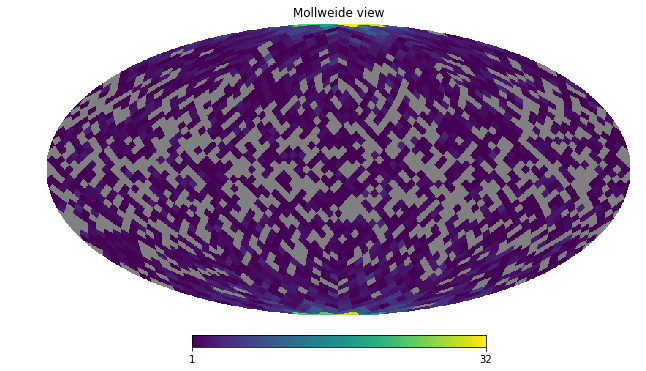

In [7]:
hp.mollview(field_final_positions)

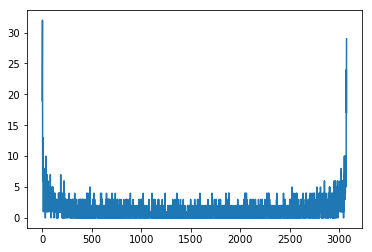

In [8]:
field_final_positions[np.where(field_final_positions == hp.UNSEEN)] = 0
plt.plot(field_final_positions)